In [2]:
import pandas as pd
import numpy as np
import time

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (WhiteKernel, ExpSineSquared, RBF,
                                      Exponentiation, Matern, RationalQuadratic)

from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt



In [14]:


## Load data from the csv file for training and validation
df = pd.read_csv("../data/train-eval.csv", index_col = 0, header = None,
                 names = ['index', 'wall', 'roof', 'glazing','wwr',
                          'shading device', 'orientaition', 'energy cost', 
                          'operational cooling load carbon', 
                          'envelop embodied carbon', 
                          'total carbon per meter square'])
df['orientaition'].replace('-', 0, inplace = True)
df = df.astype(float)
wall = {1: 0.2, 2: 0.24, 3: 0.31, 4: 0.33}
roof = {1: 0.19, 2: 0.18, 3: 0.20}
glazing = {1: 1.65, 2: 2.16, 3: 1.52, 4: 1.16}
input012 = {'wall': wall, 'roof': roof, 'glazing': glazing}

for key1 in input012:
  for key2 in input012[key1]:
    df[key1].replace(key2, input012[key1][key2], inplace = True)

df['eui'] = ((df['operational cooling load carbon']/(20*0.757)) / 
  ((df['operational cooling load carbon'] + df['envelop embodied carbon'])
  / df['total carbon per meter square']))

max_val = df.max()
for key, value in zip(max_val.keys(), max_val):
  df[key] = df[key].divide(np.float32(value))

## Load data from the csv file for test
df2 = pd.read_csv("../data/test.csv", index_col = 0, header = None,
                 names = ['index', 'wall', 'roof', 'glazing','wwr',
                          'shading device', 'orientaition', 'energy cost', 
                          'operational cooling load carbon', 
                          'envelop embodied carbon', 
                          'total carbon per meter square'])
df2['orientaition'].replace('-', 0, inplace = True)
df2 = df2.astype(float)

for key1 in input012:
  for key2 in input012[key1]:
    df2[key1].replace(key2, input012[key1][key2], inplace = True)

df2['eui'] = ((df2['operational cooling load carbon']/(20*0.757)) / 
  ((df2['operational cooling load carbon'] + df2['envelop embodied carbon'])
  / df2['total carbon per meter square']))

for key, value in zip(max_val.keys(), max_val):
  df2[key] = df2[key].divide(np.float32(value))


train_size = np.int32(0.8 * df.index.size)
train_x = df.values[0:train_size,0:6]
train_y = df.values[0:train_size,-2:]

val_x = df.values[train_size:,0:6]
val_y = df.values[train_size:,-2:]

test_x = df2.values[:,0:6]
test_y = df2.values[:,-2:]

In [68]:
## kernel 1

kernel = (1.0 * ExpSineSquared(1.0, 3.0, periodicity_bounds=(1e-2, 1e3)) + 
         WhiteKernel(1e-3))
gaussian_process = GaussianProcessRegressor(kernel = kernel, 
                                            optimizer = 'fmin_l_bfgs_b',
                                            n_restarts_optimizer = 20)
start_time = time.time()
gaussian_process.fit(train_x, train_y)
print(
    f"Time for GaussianProcessRegressor fitting: {time.time() - start_time:.3f} seconds"
)

pred_train_y = gaussian_process.predict(train_x)
pred_val_y = gaussian_process.predict(val_x)
# pred_test_y = gaussian_process.predict(test_x)


# training metric
train_mse = mean_squared_error(train_y, pred_train_y )
train_mae = mean_absolute_error(train_y, pred_train_y)

# validation metric
val_mse = mean_squared_error(val_y, pred_val_y)
val_mae = mean_absolute_error(val_y, pred_val_y)

print("train VS val (mean_squared_error): ", train_mse, "   ", val_mse)
print("train VS val (mean_absolute_error): ", train_mae, "   ", val_mae)



Time for GaussianProcessRegressor fitting: 1.774 seconds
train VS val (mean_squared_error):  7.922793429859578e-05     0.00018020546546139676
train VS val (mean_absolute_error):  0.006604233512289545     0.010803192669187563


In [73]:
## kernel 2
kernel = (0.5 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + 
         WhiteKernel(1e-3))
gaussian_process = GaussianProcessRegressor(kernel = kernel, 
                                            optimizer = 'fmin_l_bfgs_b',
                                            n_restarts_optimizer = 20)
start_time = time.time()
gaussian_process.fit(train_x, train_y)
print(
    f"Time for GaussianProcessRegressor fitting: {time.time() - start_time:.3f} seconds"
)

pred_train_y = gaussian_process.predict(train_x)
pred_val_y = gaussian_process.predict(val_x)
# pred_test_y = gaussian_process.predict(test_x)

# training metric
train_mse = mean_squared_error(train_y, pred_train_y )
train_mae = mean_absolute_error(train_y, pred_train_y)

# validation metric
val_mse = mean_squared_error(val_y, pred_val_y)
val_mae = mean_absolute_error(val_y, pred_val_y)

print("train VS val (mean_squared_error): ", train_mse, "   ", val_mse)
print("train VS val (mean_absolute_error): ", train_mae, "   ", val_mae)



Time for GaussianProcessRegressor fitting: 2.613 seconds
train VS val (mean_squared_error):  8.202746283244707e-05     0.00017823328393843667
train VS val (mean_absolute_error):  0.006744794930311038     0.010810551005801094


In [70]:
## kernel 3
kernel = (1 * Exponentiation(RationalQuadratic(), exponent=2) + 
         WhiteKernel(1e-3))
gaussian_process = GaussianProcessRegressor(kernel = kernel, 
                                            optimizer = 'fmin_l_bfgs_b',
                                            n_restarts_optimizer = 20)
start_time = time.time()
gaussian_process.fit(train_x, train_y)
print(
    f"Time for GaussianProcessRegressor fitting: {time.time() - start_time:.3f} seconds"
)

pred_train_y = gaussian_process.predict(train_x)
pred_val_y = gaussian_process.predict(val_x)
# pred_test_y = gaussian_process.predict(test_x)

# training metric
train_mse = mean_squared_error(train_y, pred_train_y )
train_mae = mean_absolute_error(train_y, pred_train_y)

# validation metric
val_mse = mean_squared_error(val_y, pred_val_y)
val_mae = mean_absolute_error(val_y, pred_val_y)

print("train VS val (mean_squared_error): ", train_mse, "   ", val_mse)
print("train VS val (mean_absolute_error): ", train_mae, "   ", val_mae)




/home/zzj/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Time for GaussianProcessRegressor fitting: 4.455 seconds
train VS val (mean_squared_error):  7.90276294443399e-05     0.00017858153313414748
train VS val (mean_absolute_error):  0.006594383655548097     0.010758972201566103


In [72]:
## kernel 4
kernel = (1 * Matern(length_scale=1.0, nu=1.5) + 
         WhiteKernel(1e-3))
gaussian_process = GaussianProcessRegressor(kernel = kernel, 
                                            optimizer = 'fmin_l_bfgs_b',
                                            n_restarts_optimizer = 20)
start_time = time.time()
gaussian_process.fit(train_x, train_y)
print(
    f"Time for GaussianProcessRegressor fitting: {time.time() - start_time:.3f} seconds"
)

pred_train_y = gaussian_process.predict(train_x)
pred_val_y = gaussian_process.predict(val_x)

# training metric
train_mse = mean_squared_error(train_y, pred_train_y )
train_mae = mean_absolute_error(train_y, pred_train_y)

# validation metric
val_mse = mean_squared_error(val_y, pred_val_y)
val_mae = mean_absolute_error(val_y, pred_val_y)

print("train VS val (mean_squared_error): ", train_mse, "   ", val_mse)
print("train VS val (mean_absolute_error): ", train_mae, "   ", val_mae)




Time for GaussianProcessRegressor fitting: 2.990 seconds
train VS val (mean_squared_error):  6.752389045037484e-05     0.0002298713370764852
train VS val (mean_absolute_error):  0.006050755778187304     0.011950034342038311


test mean_squared_error:  164.10760325201628
test mean_absolute_error:  7.93701364012003
test max_relative_abs_error:  0.03664093332721381
test mean_relative_abs_error:  0.012789639533092777


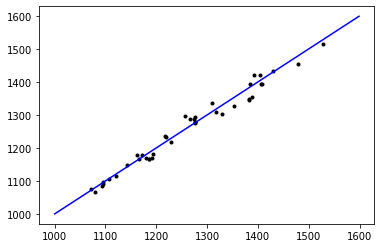

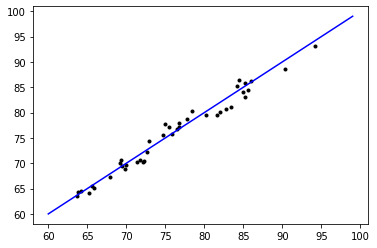

In [79]:
## select kernel 2 for test
### !!!!!!!!!!!!!!!!!!! run kernel 2 first !!!!!!!!!!!!!!!!!!!!
pred_test_y = gaussian_process.predict(test_x)

# test metric
scale = max_val[-2:].values.reshape(1,2).repeat(test_y.shape[0], axis = 0)
test_mse = mean_squared_error(test_y * scale, pred_test_y * scale)
test_mae = mean_absolute_error(test_y * scale, pred_test_y * scale)
relative_error = (test_y - pred_test_y)/test_y
test_max_relative_abs_error = np.max(np.abs(relative_error))
test_mean_relative_abs_error = np.mean(np.abs(relative_error))

print("test mean_squared_error: ", test_mse)
print("test mean_absolute_error: ", test_mae)
print("test max_relative_abs_error: ", test_max_relative_abs_error)
print("test mean_relative_abs_error: ", test_mean_relative_abs_error)


# figure, ax = plt.subplot()
plt.plot(test_y[:,0] * max_val[-2], pred_test_y[:,0] * max_val[-2], 'k.')
plt.plot(np.arange(1000,1600),np.arange(1000,1600), 'b-')
plt.show()

plt.plot(test_y[:,1] * max_val[-1], pred_test_y[:,1] * max_val[-1], 'k.')
plt.plot(np.arange(60,100),np.arange(60,100), 'b-')
plt.show()
